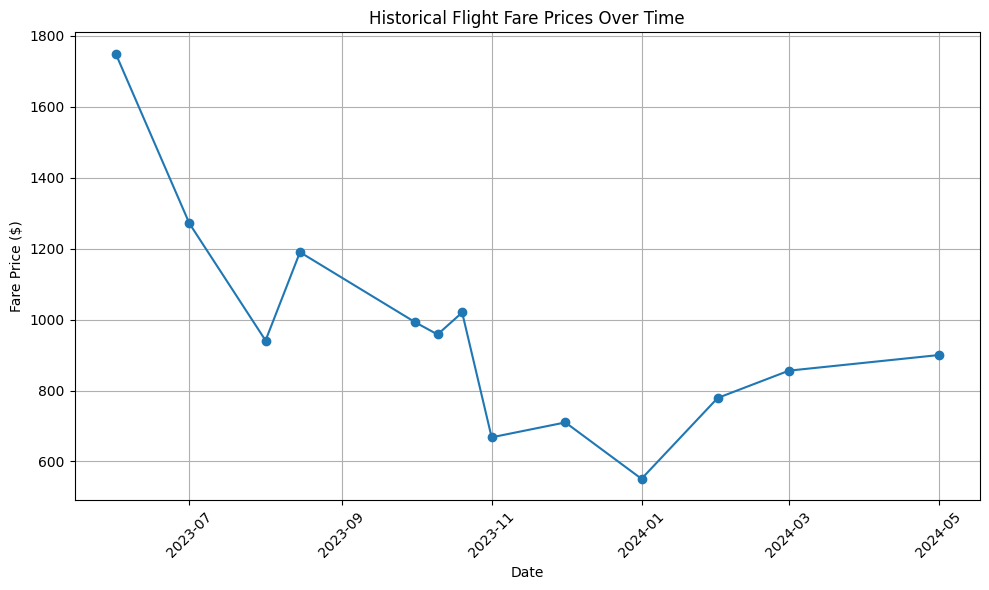

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Given historical flight fare price data
data = {
    'Jun 1, 2023': 1750,
    'Jul 1, 2023': 1271,
    'Aug 1, 2023': 941,
    'Aug 15, 2023': 1190,
    'Oct 1, 2023': 992,
    'Oct 10, 2023': 958,
    'Oct 20, 2023': 1020,
    'Nov 1, 2023': 668,
    'Dec 1, 2023': 710,
    'Jan 1, 2024': 551,
    'Feb 1, 2024': 779,
    'Mar 1, 2024': 856,
    'May 1, 2024': 900
}

# Convert data to DataFrame
df = pd.DataFrame(list(data.items()), columns=['Date', 'Price'])
df['Date'] = pd.to_datetime(df['Date'])

# Plotting historical flight fare prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Historical Flight Fare Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Fare Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    336 non-null    datetime64[ns]
 1   Price   336 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB
None


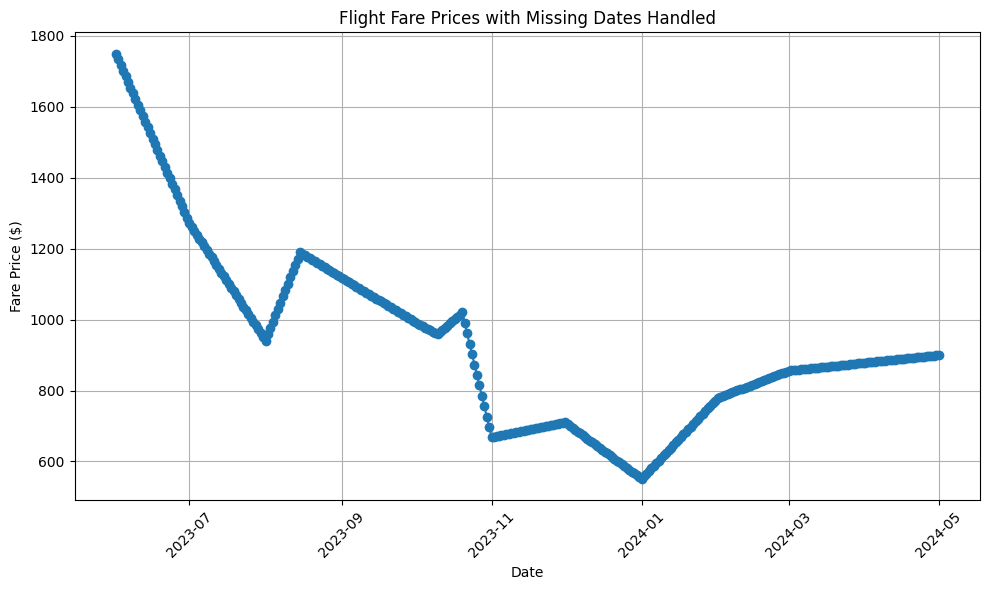

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Given historical flight fare price data
data = {
    'Jun 1, 2023': 1750,
    'Jul 1, 2023': 1271,
    'Aug 1, 2023': 941,
    'Aug 15, 2023': 1190,
    'Oct 1, 2023': 992,
    'Oct 10, 2023': 958,
    'Oct 20, 2023': 1020,
    'Nov 1, 2023': 668,
    'Dec 1, 2023': 710,
    'Jan 1, 2024': 551,
    'Feb 1, 2024': 779,
    'Mar 1, 2024': 856,
    'May 1, 2024': 900
}

# Convert data to DataFrame
df = pd.DataFrame(list(data.items()), columns=['Date', 'Price'])
df['Date'] = pd.to_datetime(df['Date'])

# Ensure all dates within the desired range are present
start_date = df['Date'].min()
end_date = df['Date'].max()
all_dates = pd.date_range(start=start_date, end=end_date)
df = df.set_index('Date').reindex(all_dates).interpolate().reset_index()

# Rename the 'index' column back to 'Date'
df = df.rename(columns={'index': 'Date'})

# Print DataFrame info to check structure and data types
print(df.info())

# Plotting the data with missing dates handled
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Flight Fare Prices with Missing Dates Handled')
plt.xlabel('Date')
plt.ylabel('Fare Price ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df


,Date,Price
0,2023-06-01,1750.000000
1,2023-06-02,1734.033333
2,2023-06-03,1718.066667
3,2023-06-04,1702.100000
4,2023-06-05,1686.133333
...,...,...
331,2024-04-27,897.114754
332,2024-04-28,897.836066
333,2024-04-29,898.557377
334,2024-04-30,899.278689


In [ ]:
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    336 non-null    datetime64[ns]
 1   Price   336 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.4 KB
None
        Date        Price
0 2023-06-01  1750.000000
1 2023-06-02  1734.033333
2 2023-06-03  1718.066667
3 2023-06-04  1702.100000
4 2023-06-05  1686.133333
                      Date        Price
count                  336   336.000000
mean   2023-11-15 12:00:00   934.550595
min    2023-06-01 00:00:00   551.000000
25%    2023-08-23 18:00:00   712.104839
50%    2023-11-15 12:00:00   884.491803
75%    2024-02-07 06:00:00  1069.567090
max    2024-05-01 00:00:00  1750.000000
std                    NaN   254.456023


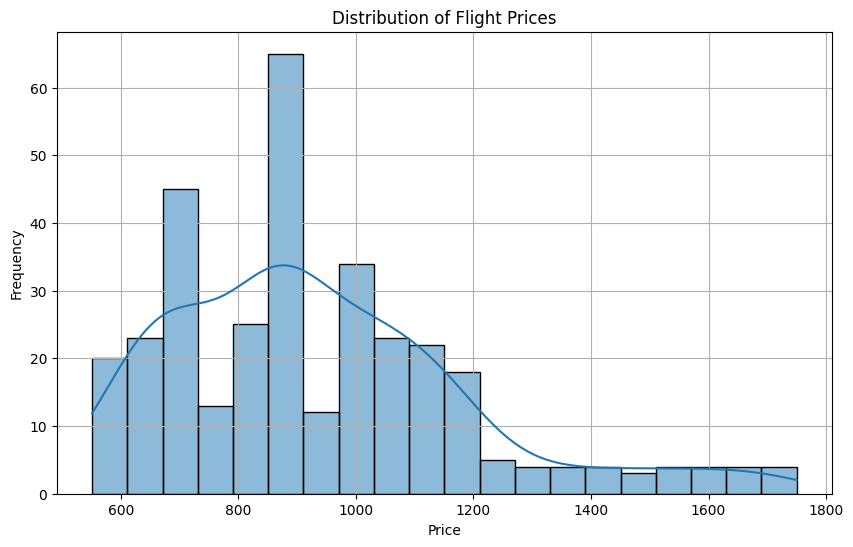

In [ ]:
print(df.info())
print(df.head())
print(df.describe())

# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
from scipy.stats import skew
# Calculate skewness of the Price column
price_skewness = skew(df['Price'].dropna())

# Print the skewness value
print(f'Skewness of Flight Prices: {price_skewness}')

Skewness of Flight Prices: 0.9817688735003754


In [ ]:
df['Price'] = np.log(df['Price'])

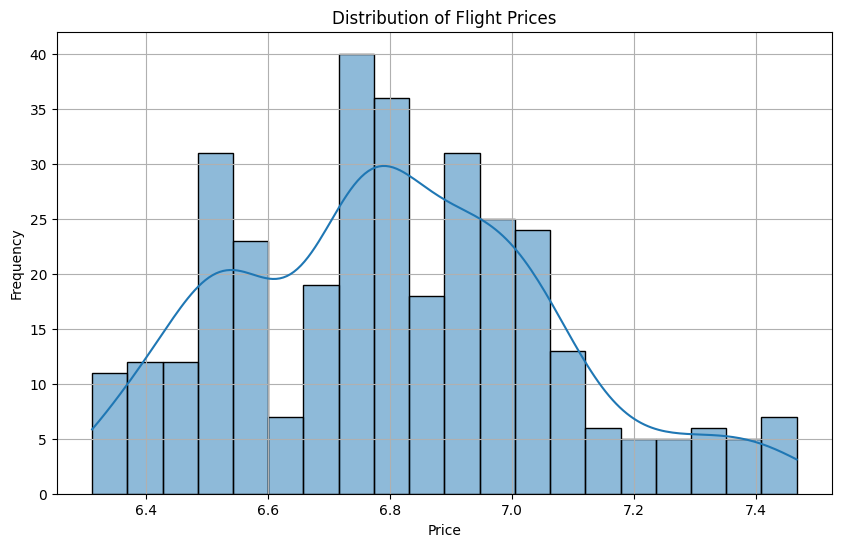

In [ ]:
# Plotting the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Season
Winter    6.543693
Spring    6.777538
Summer    7.111759
Fall      6.777816
Name: Price, dtype: float64


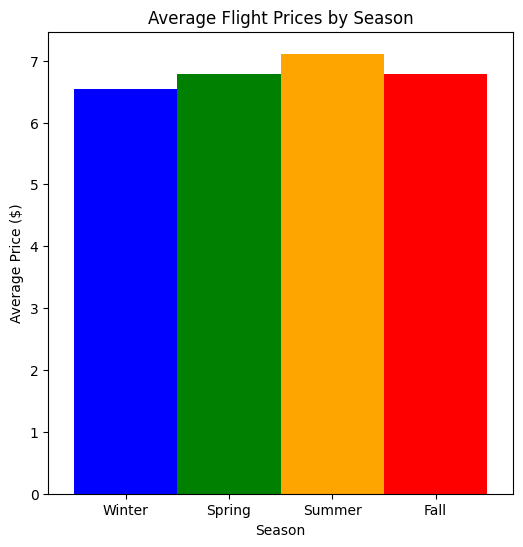

In [ ]:
# Define seasons
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a new 'Season' column
df['Season'] = df['Date'].apply(get_season)

# Calculate average price for each season
seasonal_avg_prices = df.groupby('Season')['Price'].mean().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Print seasonal average prices
print(seasonal_avg_prices)

# Plot seasonal average prices with square root scale
plt.figure(figsize=(6, 6))
seasonal_avg_prices.plot(kind='bar', color=['blue', 'green', 'orange', 'red'], width=1)  # Adjust width here
plt.title('Average Flight Prices by Season')
plt.xlabel('Season')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=0)

plt.grid(False)
plt.show()




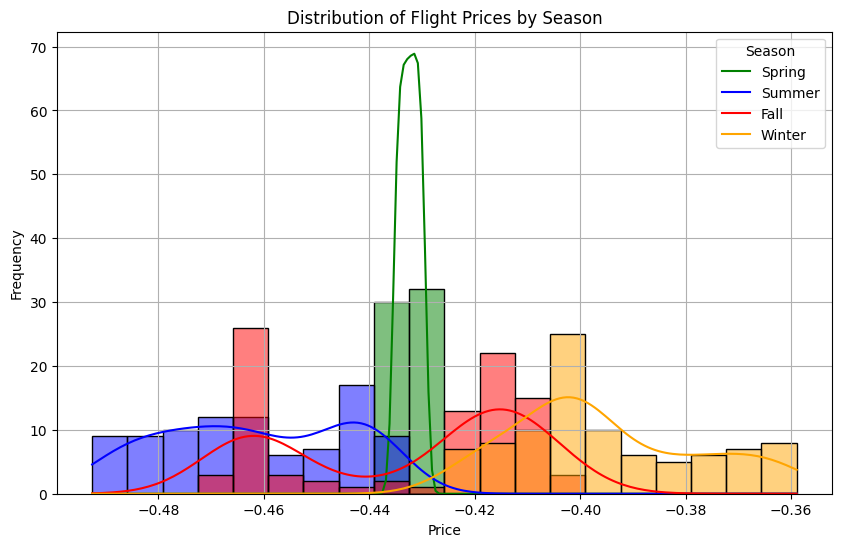

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors and corresponding labels for each season
season_colors = {'Spring': 'green', 'Summer': 'orange', 'Fall': 'red', 'Winter': 'blue'}
season_labels = ['Spring', 'Summer', 'Fall', 'Winter']

# Plotting the distribution of prices with respect to seasons
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Price', bins=20, kde=True, hue='Season', palette=season_colors)
plt.title('Distribution of Flight Prices by Season')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend(title='Season', labels=season_labels)
plt.show()


In [ ]:
!pip install ruptures

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 11.6 MB/s eta 0:00:00


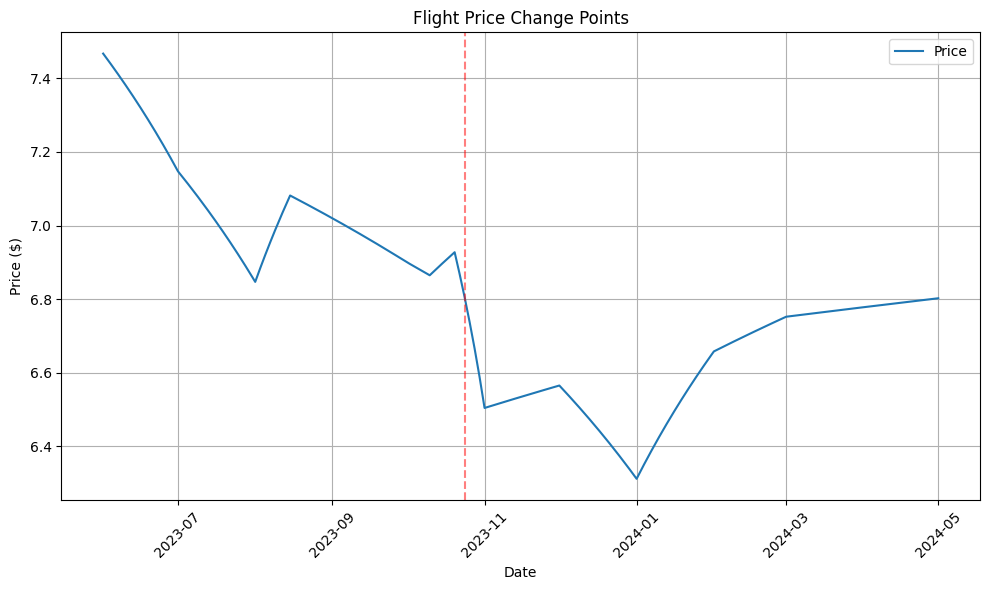

Change Point Dates:
2023-10-24 00:00:00


In [ ]:
import ruptures as rpt

# Extract time series data
time_series = df['Price'].values

# Perform change point detection using the Pelt method
model = "l2"  # l2-norm (least squares)
algo = rpt.Pelt(model=model).fit(time_series)
result = algo.predict(pen=10)  # Penalty value determines sensitivity to change

# Plot change points
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Price')

# Extract dates corresponding to change points
rupture_dates = []
for ind in result:
    if ind < len(df):
        rupture_date = df['Date'][ind]
        plt.axvline(x=rupture_date, color='red', linestyle='--', alpha=0.5)
        rupture_dates.append(rupture_date)

plt.title('Flight Price Change Points')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the dates corresponding to the change points
print("Change Point Dates:")
for date in rupture_dates:
    print(date)


Seasonal Transition: October 24 marks the transition from a peak travel season to an off-peak season in many regions. As demand decreases following the end of peak travel periods, airlines may adjust prices downward to attract travelers during quieter periods.

Post-Holiday Lull: Following major holidays or seasonal events in the preceding weeks, such as the end of summer vacations or fall festivals, there may be a lull in travel demand. Airlines may respond by lowering prices to stimulate demand and fill empty seats.

In [ ]:
import pandas as pd

# Assuming df is your DataFrame containing the data
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Specify the split date
split_date = pd.to_datetime('2024-04-01')

# Split the data into training and test sets
train_df = df[df['Date'] < split_date]
test_df = df[df['Date'] >= split_date]

In [ ]:
print(train_df)

          Date     Price  Season
0   2023-06-01  7.467371  Summer
1   2023-06-02  7.458205  Summer
2   2023-06-03  7.448955  Summer
3   2023-06-04  7.439618  Summer
4   2023-06-05  7.430193  Summer
..         ...       ...     ...
300 2024-03-27  6.773943  Spring
301 2024-03-28  6.774767  Spring
302 2024-03-29  6.775591  Spring
303 2024-03-30  6.776414  Spring
304 2024-03-31  6.777236  Spring

[305 rows x 3 columns]


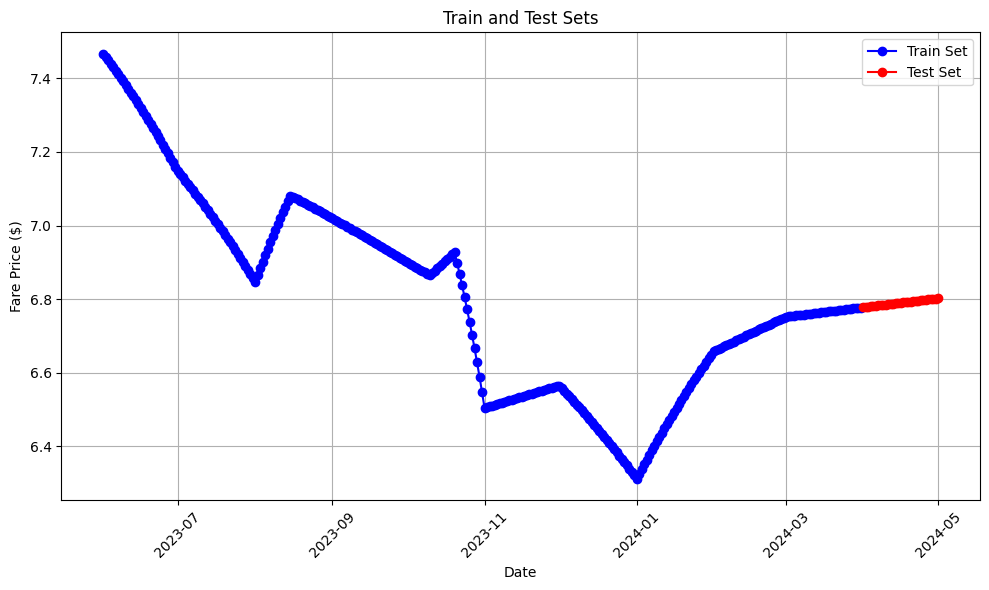

In [ ]:
import matplotlib.pyplot as plt

# Plotting train and test sets
plt.figure(figsize=(10, 6))

# Plot train set
plt.plot(train_df['Date'], train_df['Price'], marker='o', linestyle='-', color='blue', label='Train Set')

# Plot test set
plt.plot(test_df['Date'], test_df['Price'], marker='o', linestyle='-', color='red', label='Test Set')

plt.title('Train and Test Sets')
plt.xlabel('Date')
plt.ylabel('Fare Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-114-ed0f83ec6713>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Date'] = X_train['Date'].map(pd.Timestamp.toordinal)
<ipython-input-114-ed0f83ec6713>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Date'] = X_test['Date'].map(pd.Timestamp.toordinal)
<ipython-input-114-ed0f83ec6713>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

MAPE for Random Forest: 0.16%
MAPE for XGBoost: 0.21%
MAPE for Linear Regression: 4.10%
MAPE for SVR: 0.51%
MAPE for Decision Tree: 0.15%


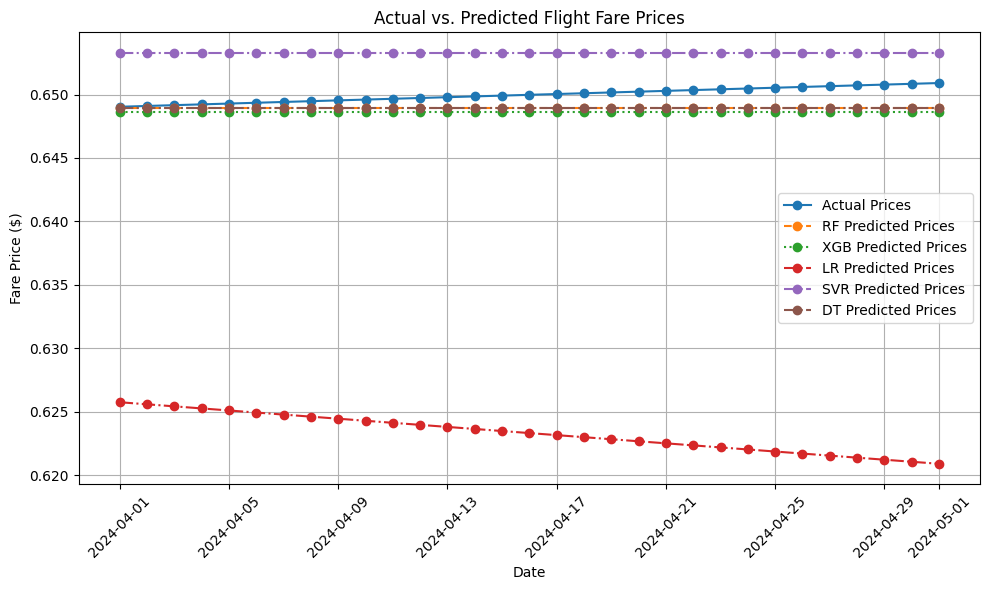

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Apply log transform to the Price
df['Price'] = np.log(df['Price'])

# Specify the split date
split_date = pd.to_datetime('2024-04-01')

# Split the data into training and test sets
train_df = df[df['Date'] < split_date].copy()
test_df = df[df['Date'] >= split_date].copy()

# Prepare training features and target
X_train = train_df[['Date', 'Season']]
y_train = train_df['Price']

# Prepare testing features and target
X_test = test_df[['Date', 'Season']]
y_test = test_df['Price']

# Convert datetime to numerical representation for the models
X_train['Date'] = X_train['Date'].map(pd.Timestamp.toordinal)
X_test['Date'] = X_test['Date'].map(pd.Timestamp.toordinal)

# Label encode the 'Season' column
le = LabelEncoder()
X_train['Season'] = le.fit_transform(X_train['Season'])
X_test['Season'] = le.transform(X_test['Season'])

# Function to train and predict for each model
def train_and_predict(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Train and predict for Random Forest
rf_model = RandomForestRegressor()
y_pred_rf = train_and_predict(rf_model)

# Train and predict for XGBoost
xgb_model = XGBRegressor()
y_pred_xgb = train_and_predict(xgb_model)

# Train and predict for Linear Regression
lr_model = LinearRegression()
y_pred_lr = train_and_predict(lr_model)

# Train and predict for Support Vector Regression
svr_model = SVR()
y_pred_svr = train_and_predict(svr_model)

# Train and predict for Decision Tree Regressor
dt_model = DecisionTreeRegressor()
y_pred_dt = train_and_predict(dt_model)

# Calculate MAPE for each model
mape_rf = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred_rf))
mape_xgb = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred_xgb))
mape_lr = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred_lr))
mape_svr = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred_svr))
mape_dt = mean_absolute_percentage_error(np.exp(y_test), np.exp(y_pred_dt))

# Print MAPE for each model
print(f"MAPE for Random Forest: {mape_rf * 100:.2f}%")
print(f"MAPE for XGBoost: {mape_xgb * 100:.2f}%")
print(f"MAPE for Linear Regression: {mape_lr * 100:.2f}%")
print(f"MAPE for SVR: {mape_svr * 100:.2f}%")
print(f"MAPE for Decision Tree: {mape_dt * 100:.2f}%")

# Plotting actual vs. predicted values without log transformation
plt.figure(figsize=(10, 6))
plt.plot(test_df['Date'], np.exp(y_test), label='Actual Prices', marker='o', linestyle='-')
plt.plot(test_df['Date'], np.exp(y_pred_rf), label='RF Predicted Prices', marker='o', linestyle='--')
plt.plot(test_df['Date'], np.exp(y_pred_xgb), label='XGB Predicted Prices', marker='o', linestyle=':')
plt.plot(test_df['Date'], np.exp(y_pred_lr), label='LR Predicted Prices', marker='o', linestyle='-.')
plt.plot(test_df['Date'], np.exp(y_pred_svr), label='SVR Predicted Prices', marker='o', linestyle='-.')
plt.plot(test_df['Date'], np.exp(y_pred_dt), label='DT Predicted Prices', marker='o', linestyle='-.')
plt.title('Actual vs. Predicted Flight Fare Prices')
plt.xlabel('Date')
plt.ylabel('Fare Price ($)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Data
data = {
    "Model": ["Random Forest", "XGBoost", "Linear Regression", "SVR", "Decision Tree"],
    "MAPE": ["0.16%", "0.21%", "4.10%", "0.51%", "0.15%"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print DataFrame
print(df)


               Model   MAPE
0      Random Forest  0.16%
1            XGBoost  0.21%
2  Linear Regression  4.10%
3                SVR  0.51%
4      Decision Tree  0.15%
